<a href="https://colab.research.google.com/github/slyofzero/ML-algorithms-from-SCRATCH/blob/main/Decision_Trees_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.rename(columns = {"PAY_0":"PAY_1", "default.payment.next.month":"DEFAULT"}, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
sample_df = df[['EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']].sample(n = 24, random_state = 5)
sample_df.head()

,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
8033,2,1,0,0,-1,0,0,-1,0
29952,2,1,-1,-1,-1,-1,0,-1,0
2736,2,2,0,0,0,0,0,0,0
29677,2,1,0,0,-2,-2,-1,0,0
3285,1,1,0,0,0,0,2,0,0


In [ ]:
def entropy_before_split(df, target):
  p = df[target].value_counts() / df.shape[0]
  return -np.sum(p * np.log2(p))

entropy_before_split(df = sample_df, target = "DEFAULT")

0.7382848661434506

In [ ]:
def entropy_after_split(df, feature, target):
  counts = df[feature].value_counts().sort_index().values
  
  grouped_df = df.groupby([feature, target]).count().sort_index().iloc[:, :1]

  new_grouped_df = grouped_df.groupby(feature)
  p_counts = np.array([])

  for group in new_grouped_df.groups.keys():
    group_df = new_grouped_df.get_group(group)
    group_counts = group_df.sum().values
    p_counts = np.append(p_counts, np.repeat(a = group_counts, repeats = group_df.shape[0]))

  p = grouped_df.iloc[:, 0] / p_counts
  
  entropy = round((-p * np.log2(p)).reset_index().groupby([feature]).sum(), 2)
  weighted_entropy = np.sum(entropy.iloc[:, 0] * (counts / df.shape[0]))

  return round(weighted_entropy, 2)

entropy_after_split(df = sample_df, feature = "EDUCATION", target = "DEFAULT")

0.58

In [ ]:
def root_node(df, features, target):
    ebs = entropy_before_split(df = df, target = target)
    igs = []

    for feature in features:
        eas = entropy_after_split(df, feature = feature, target = target)
        igs.append((feature, round(ebs - eas, 2)))

    return sorted(igs, key = lambda item:item[-1])[-1][0]

root_node(df = sample_df, features = sample_df.columns[:-1], target = "DEFAULT")

'EDUCATION'

In [ ]:
def get_subtable(df, feature, values):
  return df[df[feature] == values]

new_df = get_subtable(df = sample_df, feature = "EDUCATION", values = 1)
node1 = root_node(new_df, new_df.columns[:-1], new_df.columns[-1])
get_subtable(df = new_df, feature = node1, values = -1)

,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
13551,1,2,-1,-1,-1,-2,-1,-1,0
4397,1,1,-1,-1,-1,-1,-1,-1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample_df.iloc[:, :-1], sample_df.iloc[:, -1], test_size = 0.3, random_state = 42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

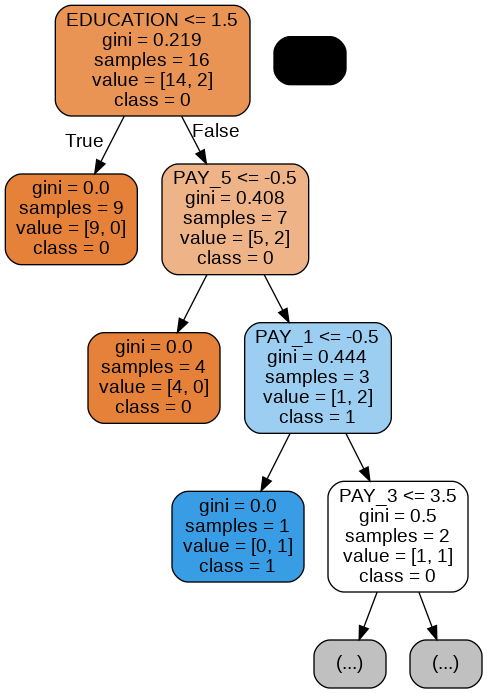

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree = dtree, out_file = dot_data, filled = True, rounded = True,
                feature_names = X_train.columns, class_names = ['0', '1'], max_depth = 3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())